In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import numpy as np
import pandas as pd
from tensorflow import keras as k
from keras.utils import np_utils
import cv2
from PIL import Image
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Flatten, Conv2D, Dropout, Dense

# Loading Dataset and Preprocessing

[Image Thresholding](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)

[Closing, Dilation](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)

[Gaussian Blur](https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html)

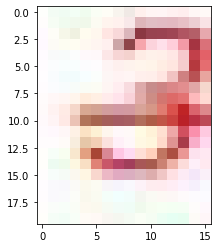

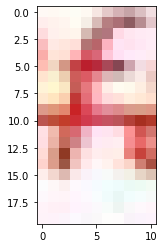

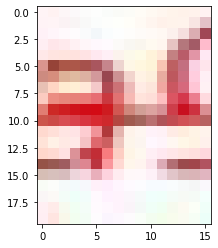

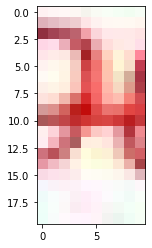

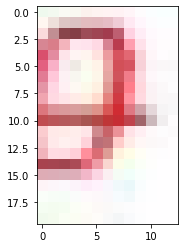

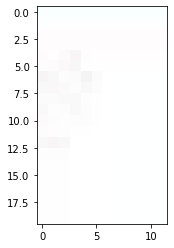

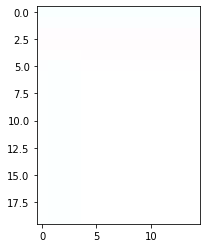

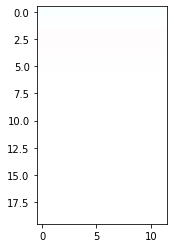

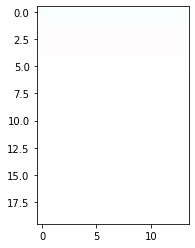

In [5]:
def split_image_by_coordinates(image_path, character_coordinates):
    # Open the image using Pillow
    img = Image.open(image_path)

    # Extract sub-images based on coordinates
    sub_images = []
    for coordinates in character_coordinates:
        x_start, y_start, x_end, y_end = coordinates
        sub_image = img.crop((x_start, y_start, x_end, y_end))
        sub_images.append(sub_image)

    return sub_images

# Example usage
image_path = '/kaggle/input/screenshots/3fa90____.png'

# Specify coordinates for each character region (x_start, y_start, x_end, y_end)
character_coordinates = [
    (20, 15, 36, 35),
    (36, 15, 47, 35),
    (47, 15, 63, 35),
    (63, 15, 73, 35),
    (73, 15, 86, 35),
    (87, 15, 99, 35),
    (99, 15, 114, 35),
    (114, 15, 126, 35),
    (126, 15, 140, 35),
]

sub_images = split_image_by_coordinates(image_path, character_coordinates)

# Display or save the sub-images as needed
# for i, sub_image in enumerate(sub_images):
#     sub_image.show()  # or sub_image.save(f'sub_image_{i}.png')
for i, sub_image in enumerate(sub_images):
    plt.imshow(sub_image)
    plt.show()
# c0c71062e    | 36733c0fd

In [1]:
X=[]
y=[]

# Since there are subfolders inside the input directory, we've used nested loops
for dirname, _, filenames in os.walk('/kaggle/input/captcha-screenshots/Captcha_screenshots'):
    for filename in filenames:
#         print(filename)
        path=os.path.join(dirname, filename)
#         print(path)
        
        
# Preprocessing the image:
# - read image
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         print(image)
#         print("111111111")
#         plt.imshow(image)
#         plt.show()
# - Adaptive Threshold: For every pixel, the same threshold value is applied. If the pixel value
# is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value
# It removes the greyish tinge off the image.
        image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
#         print("2222222")
    
#         plt.imshow(image[10:35,23:36])
#         plt.show()
# - Closing: It is useful in closing small holes inside the foreground objects, 
# or small black points on the object
        kernel = np.ones((2,2),np.uint8)
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#         print("333333333")
        
#         plt.imshow(image[10:35,23:36])
#         plt.show()
# - Dilation: So it increases the white region in the image or 
# size of foreground object increases
        kernel = np.ones((2,2),np.uint8)
        image = cv2.dilate(image, kernel, iterations = 1)
#         print("4444444444")
#         plt.imshow(image[15:35,23:36])
#         plt.show()
# - Blur: As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc.
# LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.
        image = cv2.GaussianBlur(image, (5,5), 0)
#         print("55555555")
#         plt.imshow(image[15:35,23:36])
#         plt.show()

# Splitting up the image into sections of each character
#         x=[image[15:35,20:36],image[15:35,30:46],
#                  image[15:35,40:56],image[15:35,50:66],image[15:35,60:76],image[15:35,70:86],image[15:35,80:96],image[15:35,90:106],image[15:35,100:116]] # 64%
#         print(image[15:35,50:66])
#         print(image[15:35,50:66])
        
        x=[image[15:35,23:36],image[15:35,38:51],
                  image[15:35,51:64],image[15:35,64:77],image[15:35,77:90],image[15:35,90:103],image[15:35,103:116],image[15:35,113:126],image[15:35,126:139]]#95%
#         x=[image[15:35,25:37],image[15:35,36:48],
#                   image[15:35,47:59],image[15:35,58:70],image[15:35,69:81],image[15:35,80:92],image[15:35,91:103],image[15:35,102:114],image[15:35,113:125]]
#         plt.imshow(image[15:35,23:38])
#         plt.show()

# Labelling segments with the image name
        for i in range(9):
            X.append(img_to_array(Image.fromarray(x[i])))
#             print(X)
            y.append(path[len(path)-13:len(path)-4][i])
# print(X)
X=np.array(X)
y=np.array(y)

NameError: name 'os' is not defined

# Scaling X values; Label Encoding and One Hot Encoding the labels

In [3]:
X=X.astype('float32')
X/=255

y_le = LabelEncoder().fit_transform(y)
y_ohe = OneHotEncoder(sparse = False).fit_transform(y_le.reshape(len(y_le),1))

X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size = 0.2, random_state = 42)

row, col = X.shape[1],X.shape[2]
categories = y_ohe.shape[1]

info = {y_le[i] : y[i] for i in range(len(y))}
print(info)

{13: 'b', 14: 'c', 3: '2', 8: '7', 12: 'a', 16: 'e', 11: '_', 17: 'f', 9: '8', 1: '0', 4: '3', 2: '1', 7: '6', 5: '4', 15: 'd', 10: '9', 6: '5', 21: 'r', 19: 'n', 22: 's', 18: 'h', 20: 'o', 23: 't', 0: '/'}


# Creating the CNN architecture

In [4]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same', input_shape=(row,col,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(categories))
model.add(Activation("softmax"))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam' ,
              metrics = ['accuracy'])

print(model.summary())


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 13, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 20, 13, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 6, 16)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 16)         2320      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 16)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 3, 32)          4

# Fitting and training data into model

In [5]:
batch_size = 150
epochs = 200

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

Epoch 1/200
15/15 [==============================] - 1s 36ms/step - loss: 2.9059 - accuracy: 0.1906 - val_loss: 2.6410 - val_accuracy: 0.2232
Epoch 2/200
15/15 [==============================] - 0s 21ms/step - loss: 2.6020 - accuracy: 0.2220 - val_loss: 2.4937 - val_accuracy: 0.2232
Epoch 3/200
15/15 [==============================] - 0s 18ms/step - loss: 2.4381 - accuracy: 0.2612 - val_loss: 2.2188 - val_accuracy: 0.3450
Epoch 4/200
15/15 [==============================] - 0s 18ms/step - loss: 2.1494 - accuracy: 0.3456 - val_loss: 1.9935 - val_accuracy: 0.3727
Epoch 5/200
15/15 [==============================] - 0s 18ms/step - loss: 1.9532 - accuracy: 0.3969 - val_loss: 1.7042 - val_accuracy: 0.4815
Epoch 6/200
15/15 [==============================] - 0s 18ms/step - loss: 1.7514 - accuracy: 0.4615 - val_loss: 1.4594 - val_accuracy: 0.6162
Epoch 7/200
15/15 [==============================] - 0s 18ms/step - loss: 1.5546 - accuracy: 0.5427 - val_loss: 1.2964 - val_accuracy: 0.6753
Epoch 

# Evaluating performance of the model

In [6]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

17/17 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.9446
Test loss: 0.5341878533363342
Test accuracy: 0.9446494579315186


# Prediction Function:

**The purpose of this function is to process raw images into model-comprehensible data for better prediction. As we've done in data preprocessing**

In [11]:
def pred (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    image = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.GaussianBlur(image, (5,5), 0)
    
    
#     x = [image[15:35,20:36],image[15:35,30:46],
#                  image[15:35,40:56],image[15:35,50:66],image[15:35,60:76],image[15:35,70:86],image[15:35,80:96],image[15:35,90:106],image[15:35,100:116]]
#     x=[image[15:35,20:36],image[15:35,36:52],
#                   image[15:35,50:66],image[15:35,63:79],image[15:35,75:91],image[15:35,88:104],image[15:35,100:116],image[15:35,113:129],image[15:35,125:141]]
#     x=[image[15:35,25:37],image[15:35,36:48],
#                   image[15:35,47:59],image[15:35,58:70],image[15:35,69:81],image[15:35,80:92],image[15:35,91:103],image[15:35,102:114],image[15:35,113:125]]
    x=[image[15:35,23:36],image[15:35,38:51],
                  image[15:35,51:64],image[15:35,64:77],image[15:35,77:90],image[15:35,90:103],image[15:35,103:116],image[15:35,113:126],image[15:35,126:139]]
    
    X_pred = []
    for i in range(9) :
        X_pred.append(img_to_array(Image.fromarray(x[i])))
    
    X_pred = np.array(X_pred)
    X_pred/= 255.0
    
    y_pred = model.predict(X_pred)
    y_pred = np.argmax(y_pred, axis = 1)
    
    print('Prediction: ', end='')
    for res in y_pred :
        if info[res] == "_":
            pass
        else:
            print(info[res], end='')
        
#     print('\nActual:    ', img_path[len(img_path)-9:len(img_path)-4])

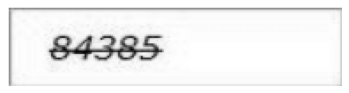

Prediction: 84385

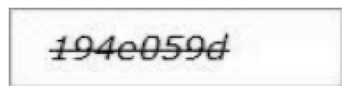

Prediction: 194e059d

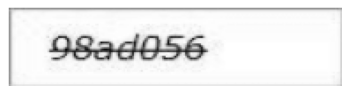

Prediction: 98ad056

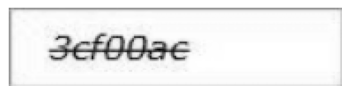

Prediction: 3cf90a

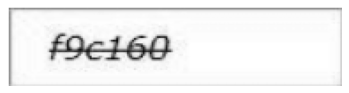

Prediction: f9c160

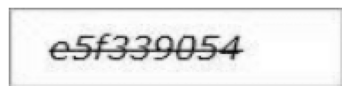

Prediction: e5f339054

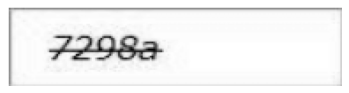

Prediction: 7298a

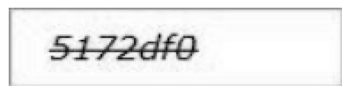

Prediction: 5172df0

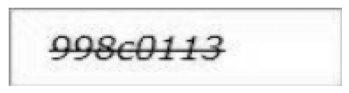

Prediction: 998c0113

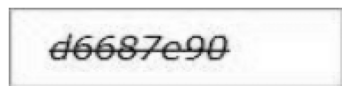

Prediction: d6687e90

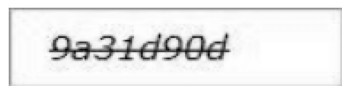

Prediction: 9a31d90d

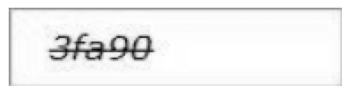

Prediction: 3fa90

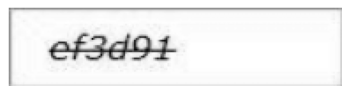

Prediction: ef3d91

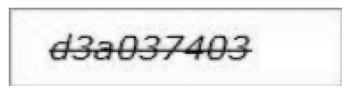

Prediction: d3a037403

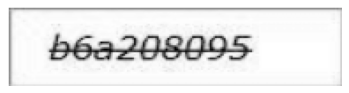

Prediction: b6a208095

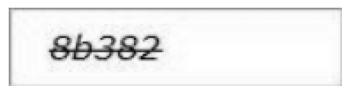

Prediction: 8b382

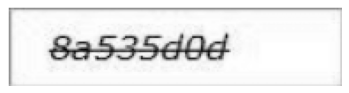

Prediction: 8a535d0d

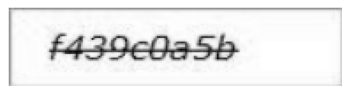

Prediction: f439c0a5b

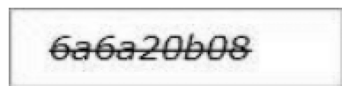

Prediction: 6a6a20b08

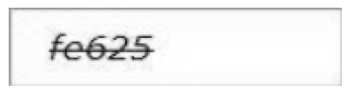

Prediction: fe625

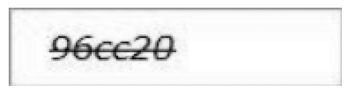

Prediction: 96cc20

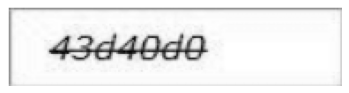

Prediction: 43d40d0

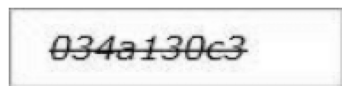

Prediction: 034a130c3

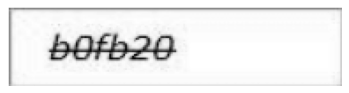

Prediction: b0fb20

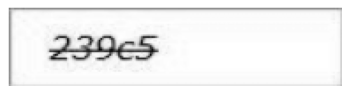

Prediction: 239c5

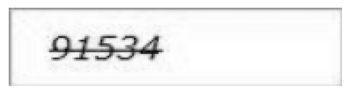

Prediction: 91534

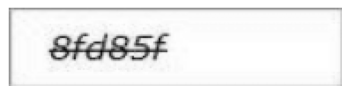

Prediction: 8fd85f

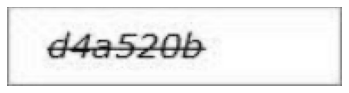

Prediction: 44740

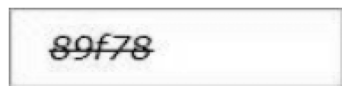

Prediction: 89f78

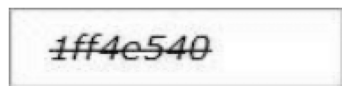

Prediction: 1ff4e540

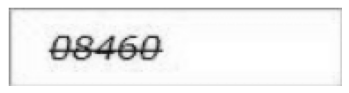

Prediction: 08460

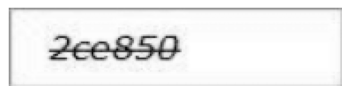

Prediction: 2ce850

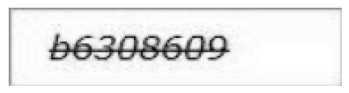

Prediction: b6308609

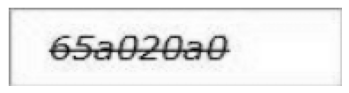

Prediction: 65a020a0

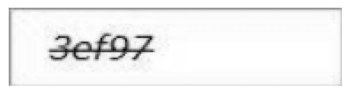

Prediction: 3ef97

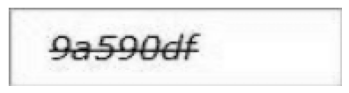

Prediction: 9a590df

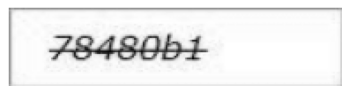

Prediction: 78480b1

In [12]:
for dirname, _, filenames in os.walk('/kaggle/input/screenshots'):
    for filename in filenames:
#         print(filename)
        path=os.path.join(dirname, filename)
#         print(path)

        pred(path)
# pred("/kaggle/input/screenshots/screen20231229_140033.png")

In [18]:
model.save('epf_captcha_recognizer.h5')